## Health Premium Prediction - ML Regression

This Project attempts to model different regression models and select a model using the R2 Score Method.

Data Set: <br>
Independent Variables: age, sex, BMI, children , smoker, region <br>
Dependent Variable : Charges

### Importing the libraries


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [55]:
dataset = pd.read_csv('Health_insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [56]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking for missing value

In [57]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data set complete with no missing values

### Encoding categorical data

In [58]:
# to check the unique elements in each column
print(dataset['sex'].unique())
print(dataset['smoker'].unique())
print(dataset['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [60]:
X[:10] 

array([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 19, 27.9, 0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 18, 33.77, 1],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 28, 33.0, 3],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 33, 22.705, 0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 32, 28.88, 0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 31, 25.74, 0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 46, 33.44, 1],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 37, 27.74, 3],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 37, 29.83, 2],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 60, 25.84, 0]],
      dtype=object)

### Splitting the dataset into the Training set and Test set

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [62]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import  StandardScaler 
column_trans1 = ColumnTransformer(
    [('scaler', StandardScaler(),[8,9,10])],
    remainder='passthrough')  

X_train = column_trans1.fit_transform(X_train)
X_test  = column_trans1.fit_transform(X_test)



### Training the Multiple Linear Regression model on the Training set

In [63]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lr=linear_regressor.predict(X_test) #prediction of this model


### Training the Polynomial Regression model on the Training set

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred_pr = regressor.predict(poly_reg.transform(X_test))  #prediction  of this model

### Training the Random Forest Regression model on the Training set

In [65]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor(random_state = 0)
random_regressor.fit(X_train, y_train)
y_pred_rr = random_regressor.predict(X_test) #prediction  of this model

### Training the Decision Tree Regression model on the Training set

In [66]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X, y)
y_pred_dt = dt_regressor.predict(X_test) #prediction  of this model

### Training the SVR model on the Training set

In [67]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel = 'rbf')
sv_regressor.fit(X_train, y_train)
y_pred_sv = sv_regressor.predict(X_test) #prediction  of this model


### Finding R2 Value of all the models

In [68]:
from sklearn.metrics import r2_score
r2_score_lr = r2_score(y_test, y_pred_lr)
r2_score_pr = r2_score(y_test, y_pred_pr)
r2_score_rr = r2_score(y_test, y_pred_rr)
r2_score_dt = r2_score(y_test, y_pred_dt)
r2_score_sv = r2_score(y_test, y_pred_sv)

print("Linear Regression r2: ",r2_score_lr,"\nPolynomial Regression r2: ",r2_score_pr,"\nRandomForest Regression r2: ",r2_score_rr,"\nDecision Tree Regression r2: ", r2_score_dt,"\nSupport Vector Regression r2: ",r2_score_sv)

Linear Regression r2:  0.7619582235838138 
Polynomial Regression r2:  0.7714748498974607 
RandomForest Regression r2:  0.8455345947600161 
Decision Tree Regression r2:  -0.5816422356160269 
Support Vector Regression r2:  -0.11343477790480705


The more the r2 score is better the model is. Here Random Forest has the best result.

### Visualizing the Result

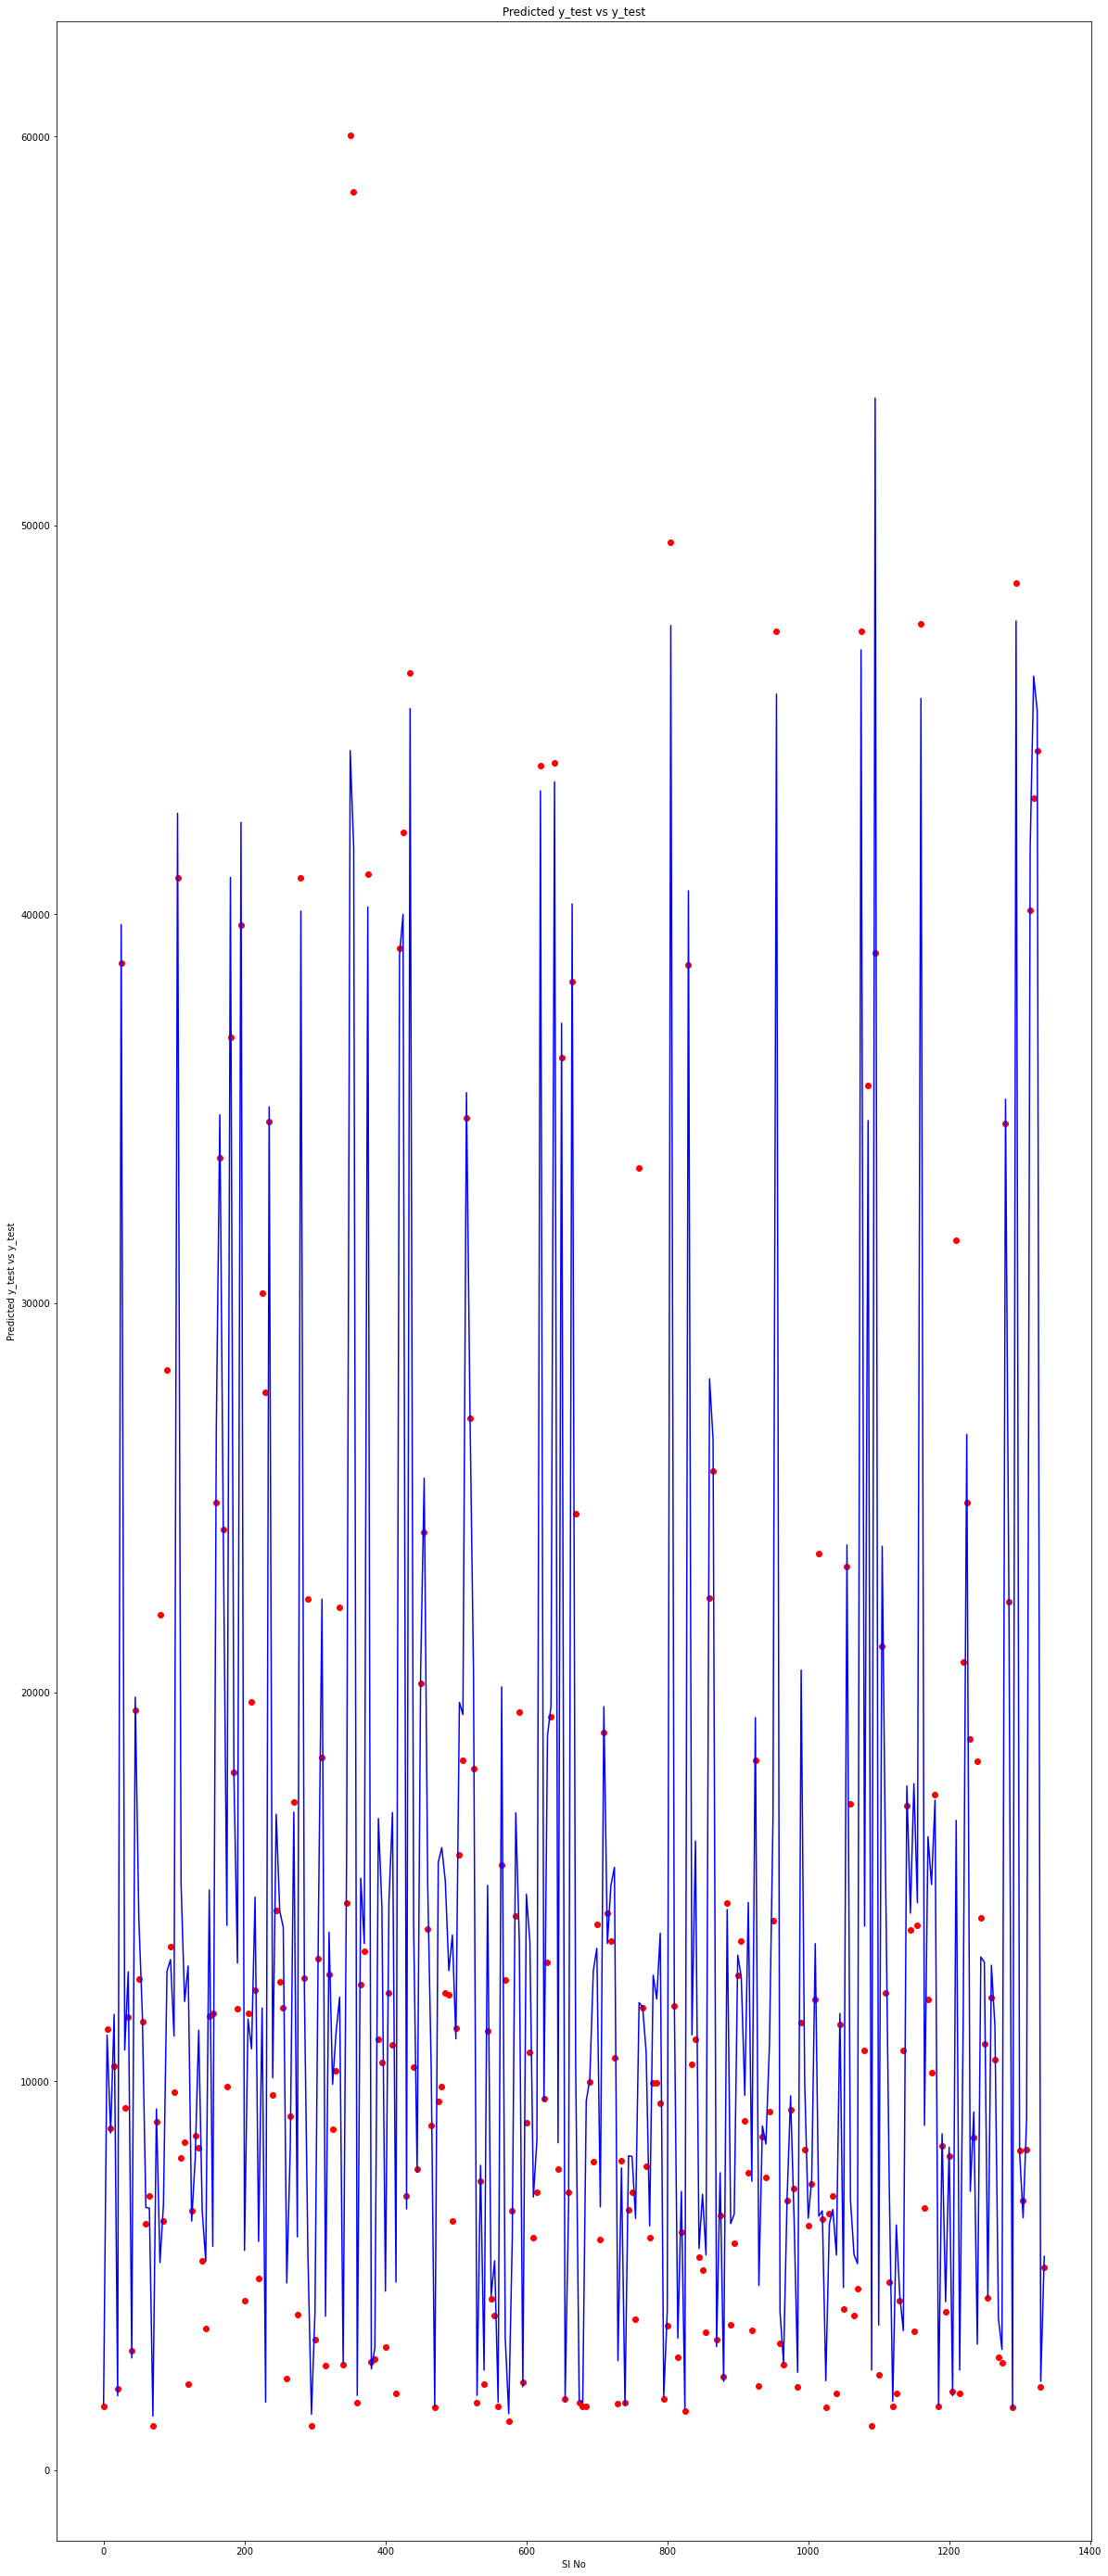

In [69]:
plt.plot(np.arange(0,1340,5),y_pred_rr, color = 'blue')
plt.scatter(np.arange(0,1340,5),y_test, color = 'red')
plt.title('Predicted y_test vs y_test')
plt.xlabel('Sl No')
plt.ylabel('Predicted y_test vs y_test')
plt.rcParams["figure.figsize"] = (20,50)
plt.show()

In [72]:
comparison= np.concatenate((y_pred_rr.reshape(len(y_pred_rr),1), y_test.reshape(len(y_test),1)),1)
comparison_data_frame = pd.DataFrame(comparison, columns = ['Predicted','Real'])
print(comparison_data_frame)

        Predicted         Real
0     1710.817623   1646.42970
1    11186.598291  11353.22760
2     8671.326294   8798.59300
3    11719.059883  10381.47870
4     1915.968562   2103.08000
..            ...          ...
263  41705.142497  40103.89000
264  46126.104332  42983.45850
265  45239.988255  44202.65360
266   2284.642816   2136.88225
267   5497.232760   5227.98875

[268 rows x 2 columns]
